In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 1. KNN을 이용하여 이미지 분류

### 1) Pre-processing of data

In [ ]:
import numpy as np
from skimage.transform import resize
from skimage.io import imread
import matplotlib.pyplot as plt
import os

In [ ]:
target = []
images = []   # In matrix format
flat_data = []  # In vector format

datadir = '/content/drive/MyDrive/project3/data/traindata/kfood/나물'
categories = ['가지볶음','고사리나물','미역줄기볶음','숙주나물','시금치나물','애호박볶음']

for category in categories:
  class_index=categories.index(category)
  path=os.path.join(datadir,category)
  for img in os.listdir(path):
    try:
      img_matrix=imread(os.path.join(path,img))
      img_resized=resize(img_matrix,(150,150,3))
      flat_data.append(img_resized.flatten())
      images.append(img_resized)
      target.append(category)
    except Exception as someReadingError:
      print(someReadingError)


Could not find a backend to open `/content/drive/MyDrive/project3/data/traindata/kfood/나물/가지볶음/crop_area.properties`` with iomode `ri`.
Could not find a backend to open `/content/drive/MyDrive/project3/data/traindata/kfood/나물/가지볶음/org_url.csv`` with iomode `ri`.
Could not find a backend to open `/content/drive/MyDrive/project3/data/traindata/kfood/나물/고사리나물/crop_area.properties`` with iomode `ri`.
Could not find a backend to open `/content/drive/MyDrive/project3/data/traindata/kfood/나물/고사리나물/org_url.csv`` with iomode `ri`.
Could not find a backend to open `/content/drive/MyDrive/project3/data/traindata/kfood/나물/미역줄기볶음/crop_area.properties`` with iomode `ri`.
Could not find a backend to open `/content/drive/MyDrive/project3/data/traindata/kfood/나물/미역줄기볶음/org_url.csv`` with iomode `ri`.
Could not find a backend to open `/content/drive/MyDrive/project3/data/traindata/kfood/나물/숙주나물/crop_area.properties`` with iomode `ri`.
Could not find a backend to open `/content/drive/MyDrive/project3/dat

In [ ]:
import pandas as pd
df=pd.DataFrame(flat_data)
df['Target']=target
df

,0,1,2,3,4,5,6,7,8,9,...,67491,67492,67493,67494,67495,67496,67497,67498,67499,Target
0,0.779273,0.743979,0.724371,0.803309,0.768015,0.747627,0.826620,0.791326,0.764655,0.850466,...,0.894645,0.859863,0.824666,0.877365,0.845286,0.820157,0.860249,0.832587,0.807285,가지볶음
1,0.255497,0.231979,0.179572,0.255702,0.236790,0.192165,0.281069,0.265999,0.230708,0.287800,...,0.971307,0.969944,0.976982,0.992779,0.992130,0.997490,0.997639,0.997636,0.997718,가지볶음
2,0.945734,0.951720,0.958860,0.949075,0.952476,0.960296,0.953358,0.955776,0.963421,0.956558,...,0.730108,0.668643,0.595031,0.689164,0.614487,0.545167,0.704215,0.641705,0.552324,가지볶음
3,0.473038,0.488299,0.384241,0.508168,0.539718,0.398592,0.501164,0.517633,0.401449,0.445922,...,0.551398,0.399579,0.150289,0.579464,0.427276,0.142668,0.436141,0.297186,0.136315,가지볶음
4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.815729,0.799650,0.693973,0.786464,0.770775,0.666418,0.768171,0.752482,0.648388,가지볶음
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,0.857802,0.806821,0.744076,0.826115,0.775135,0.712390,0.825293,0.774312,0.711567,0.822567,...,0.831430,0.768719,0.705911,0.830025,0.769252,0.702073,0.853222,0.793515,0.723564,애호박볶음
5996,0.098355,0.057551,0.047463,0.094980,0.052136,0.036518,0.097062,0.052810,0.043561,0.099191,...,0.134258,0.104420,0.086098,0.127811,0.102540,0.092960,0.141855,0.107455,0.098501,애호박볶음
5997,0.944563,0.944563,0.944563,0.963802,0.963802,0.963802,0.965425,0.965425,0.965425,0.965464,...,0.965463,0.965463,0.965461,0.965369,0.965369,0.965368,0.947994,0.947995,0.947994,애호박볶음
5998,0.056231,0.057469,0.056659,0.063380,0.066327,0.064744,0.057535,0.063542,0.060434,0.058902,...,0.017016,0.021319,0.012290,0.014011,0.015195,0.007619,0.009600,0.009604,0.006224,애호박볶음


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48374 (\N{HANGUL SYLLABLE BOGG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51020 (\N{HANGUL SYLLABLE EUM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IP

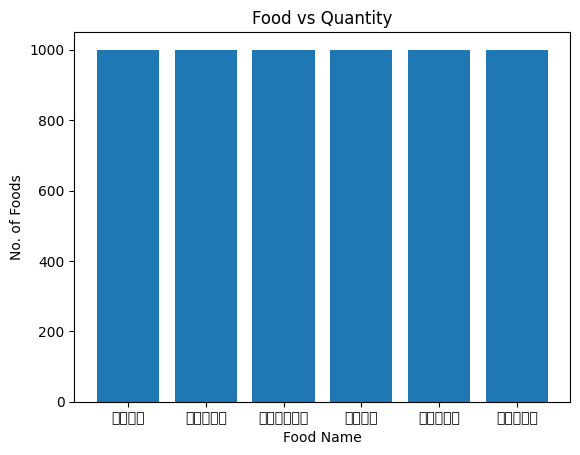

In [ ]:
# Display of the number of images of each flower type
plt.bar(categories,df['Target'].value_counts())
plt.title('Food vs Quantity')
plt.xlabel('Food Name')
plt.ylabel('No. of Foods')
plt.show()

In [ ]:
# Input and Output
x=df.iloc[:,0:67500].values
y=df.iloc[:,67500].values

### 3) Classification of images using KNN Classification Algorithm

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
k=np.arange(1,160)
param={'n_neighbors':k}
model=KNeighborsClassifier()
model_grid=GridSearchCV(model,param)
model_grid.fit(x,y)

KeyboardInterrupt: 

In [ ]:
# Best K nearest neighbor
model_grid.best_params_

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
model = KNeighborsClassifier(n_neighbors=16,metric='euclidean')
model.fit(x_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=16)

In [ ]:
# Predicted output
y_pred = model.predict(x_test)
y_pred

array(['고사리나물', '고사리나물', '숙주나물', ..., '가지볶음', '고사리나물', '고사리나물'],
      dtype=object)

In [ ]:
# Actual output
y_test

array(['시금치나물', '미역줄기볶음', '애호박볶음', ..., '고사리나물', '시금치나물', '고사리나물'],
      dtype=object)

In [ ]:
# Evaluation of the model
from sklearn.metrics import accuracy_score
print("The accuracy of the model is ",accuracy_score(y_pred,y_test)*100,"%")

The accuracy of the model is  30.266666666666666 %


### 4) Confusion Matrix and Classification report

In [ ]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_pred,y_test)
cm

array([[ 20,  16,   6,   1,  15,   2],
       [ 33,  75,  31,   1,  61,   4],
       [ 45,  31,  52,   9,  64,  16],
       [137, 112, 131, 238,  73, 195],
       [  2,   8,  12,   0,  48,   0],
       [  8,   7,   6,   4,  16,  21]])

In [ ]:
# Classification report
from sklearn import metrics
metrics.classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n        가지볶음       0.33      0.08      0.13       245\n       고사리나물       0.37      0.30      0.33       249\n      미역줄기볶음       0.24      0.22      0.23       238\n        숙주나물       0.27      0.94      0.42       253\n       시금치나물       0.69      0.17      0.28       277\n       애호박볶음       0.34      0.09      0.14       238\n\n    accuracy                           0.30      1500\n   macro avg       0.37      0.30      0.25      1500\nweighted avg       0.38      0.30      0.26      1500\n'